This demo program solves Poisson's equation

    - div grad u(x, y) = f(x, y)

on the unit square with source f given by

    f(x, y) = 10*exp(-((x - 0.5)^2 + (y - 0.5)^2) / 0.02)

and boundary conditions given by

    u(x, y) = 0        for x = 0 or x = 1
du/dn(x, y) = sin(5*x) for y = 0 or y = 1

In [1]:
from dolfin import *
import matplotlib.pyplot as plt

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

In [3]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [4]:
# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [5]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2) # f = 1.
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

In [6]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


In [7]:
# Save solution in VTK format
file = File("poisson.pvd")
file << u

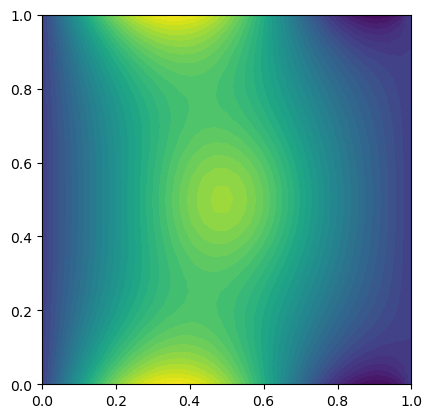

In [9]:
# Plot solution
plot(u)#, interactive=True)
plt.show()